In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime as dt
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\lenov\AppData\Local\Temp\ipykernel_14168\780585974.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



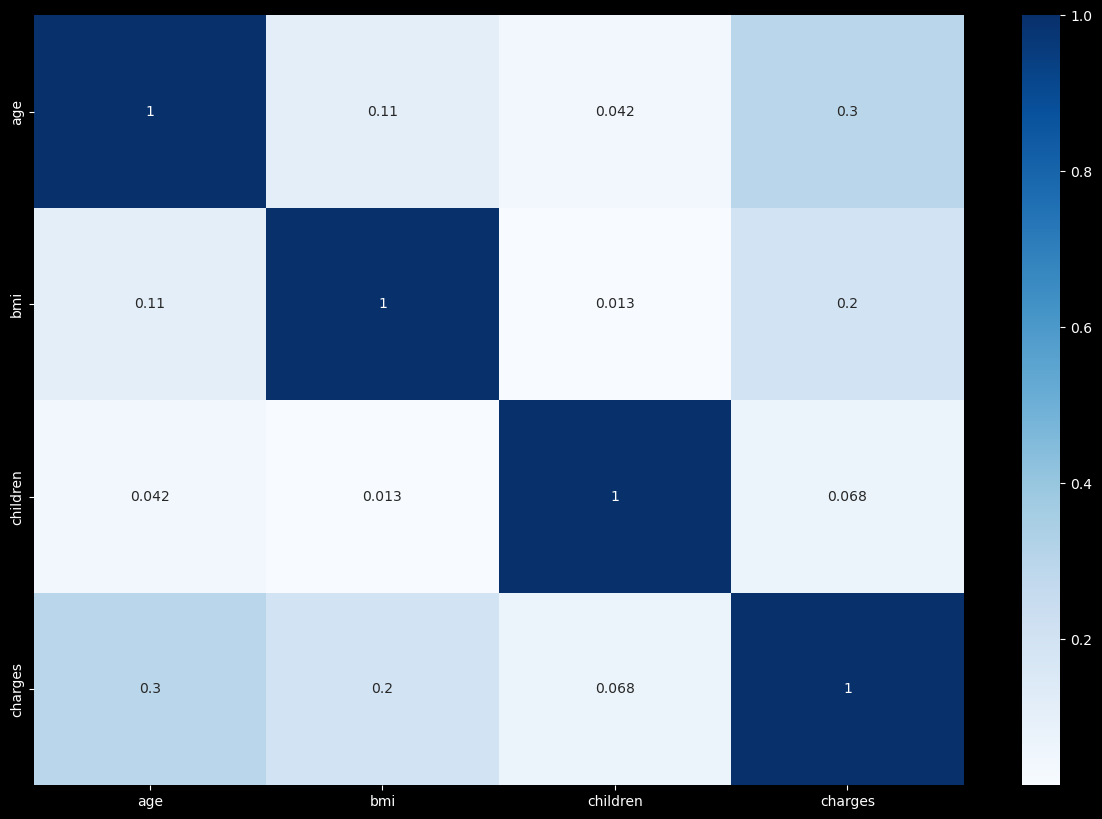

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

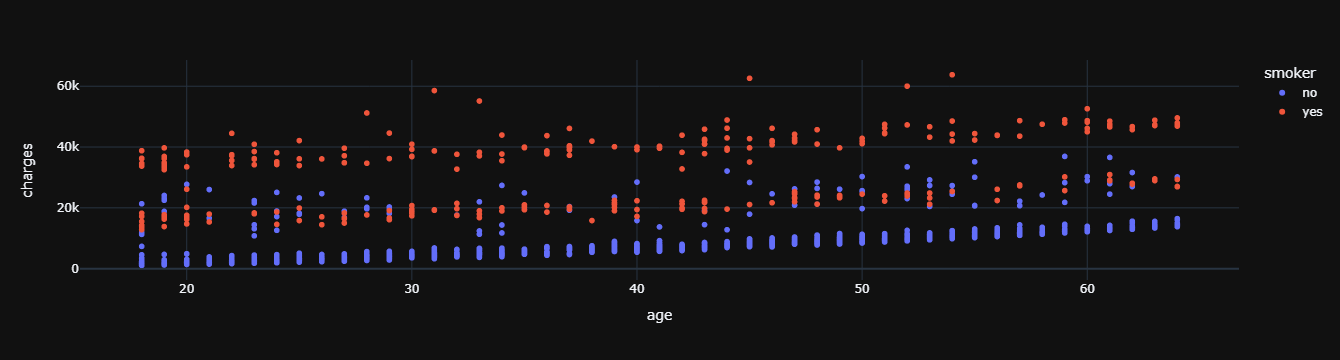

In [17]:
px.scatter(df.sort_values(by='age'),x='age',y='charges',template='plotly_dark',color='smoker')

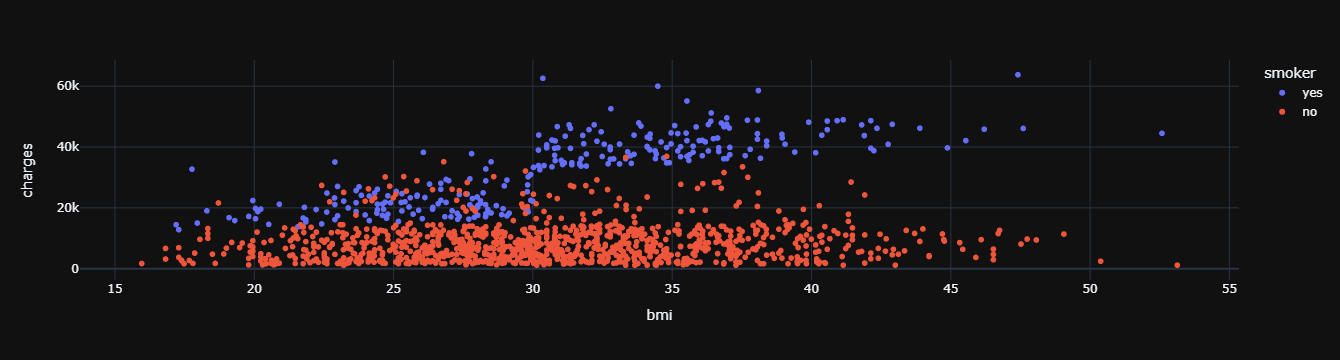

In [16]:
px.scatter(df,x='bmi',y='charges',template='plotly_dark',color='smoker')

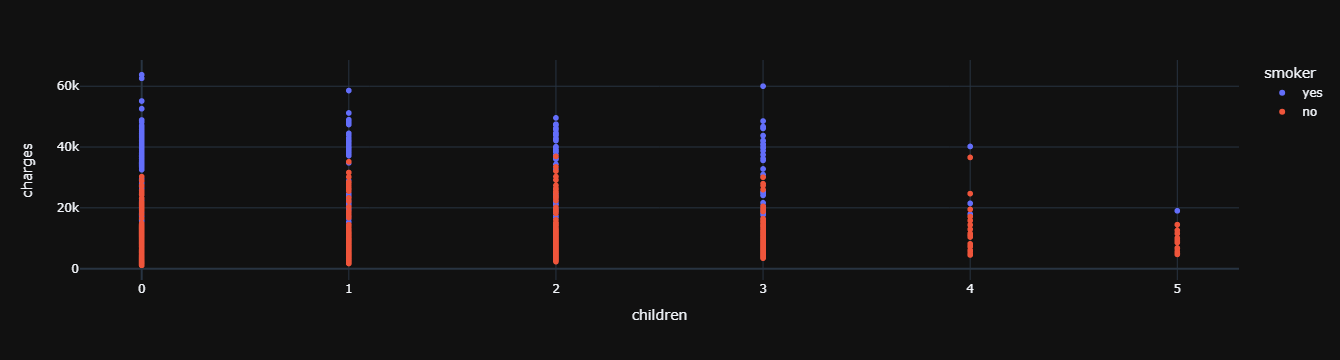

In [19]:
px.scatter(df,x='children',y='charges',template='plotly_dark',color='smoker')

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


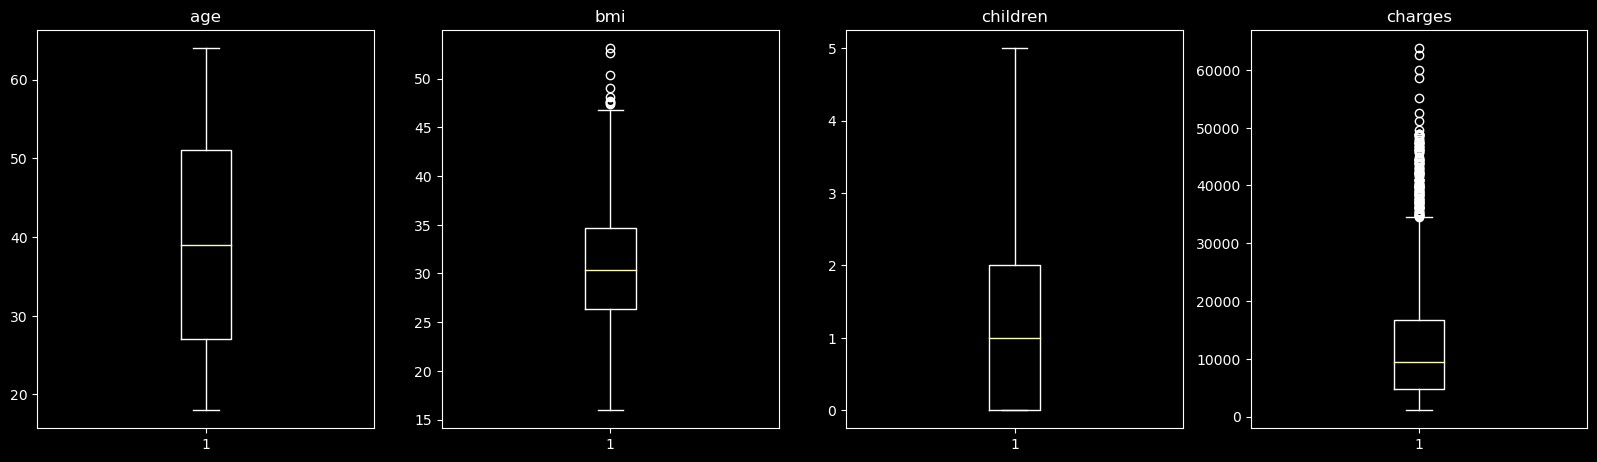

In [28]:
col_dict = {'age':1,'bmi':2,'children':3,'charges':4}
plt.figure(figsize=(20,30))
for var,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(df[var],whis=1.5)
    plt.title(var)
plt.show()

In [31]:
for var in col_dict.keys():
    q75,q25 = np.percentile(df[var],[75,25])
    iqr = q75-q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(var,
                                                                             len((np.where((df[var] > max_val) | 
                                                                                           (df[var] < min_val))[0])),len((np.where((df[var] > max_val) | 
                                                                                           (df[var] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in age : 0 and 0.0
Number of outliers and percentage of it in bmi : 9 and 0.4529441368897836
Number of outliers and percentage of it in children : 0 and 0.0
Number of outliers and percentage of it in charges : 139 and 6.995470558631102


In [37]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['smoker']=='yes','charges'],df.loc[df['smoker']=='no','charges'])

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283)

In [38]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if "yes" else 0)

In [40]:
df['sex'] = df['sex'].apply(lambda x: 1 if 'male' else 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [41]:
df = pd.concat([df,pd.get_dummies(df['region'],drop_first=True)],axis=1)
df.drop('region',axis=1,inplace=True)
df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,1,1725.55230,0,1,0
2,28,1,33.000,3,1,4449.46200,0,1,0
3,33,1,22.705,0,1,21984.47061,1,0,0
4,32,1,28.880,0,1,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,1,0,0
1334,18,1,31.920,0,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,1


In [43]:
X = df.drop('charges',axis=1)
y = df['charges']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [88]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [90]:
r2_score(y_test, pred)

-0.2444297982356043